In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import shapefile as shp

In [2]:
ciudades = pd.read_csv("geo_prueba.csv",encoding="ISO-8859-1")

In [26]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (15,10)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'b')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [21]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [41]:
asf = shp.Reader("Mexico_Urban_Areas.shp",encoding="ISO-8859-1")
areas_Mexico =  read_shapefile(asf)
areas_Mexico

,OBJECTID,CITY,MUNICIPLTY,STATE,coords
0,1,TIJUANA,TIJUANA,BAJA CALIFORNIA,"[(-116.87804394268122, 32.54230238368538), (-1..."
1,2,TECATE,TECATE,BAJA CALIFORNIA,"[(-116.59862437689812, 32.571395999941075), (-..."
2,3,MEXICALI,MEXICALI,BAJA CALIFORNIA,"[(-115.37791145506641, 32.66245044792393), (-1..."
3,4,SANTA ISABEL,MEXICALI,BAJA CALIFORNIA,"[(-115.57369142577593, 32.64678042897413), (-1..."
4,5,PROGRESO,MEXICALI,BAJA CALIFORNIA,"[(-115.57519685665997, 32.59689131361723), (-1..."
...,...,...,...,...,...
881,887,SAN PEDRO POCHUTLA,SAN PEDRO POCHUTLA,OAXACA,"[(-96.46309315058437, 15.74604357763689), (-96..."
882,888,MAPASTEPEC,MAPASTEPEC,CHIAPAS,"[(-92.88610615921894, 15.44604913363565), (-92..."
883,889,HUIXTLA,HUIXTLA,CHIAPAS,"[(-92.45403073507194, 15.1487549917342), (-92...."
884,890,TAPACHULA,TAPACHULA,CHIAPAS,"[(-92.2530242302571, 14.902242314382505), (-92..."


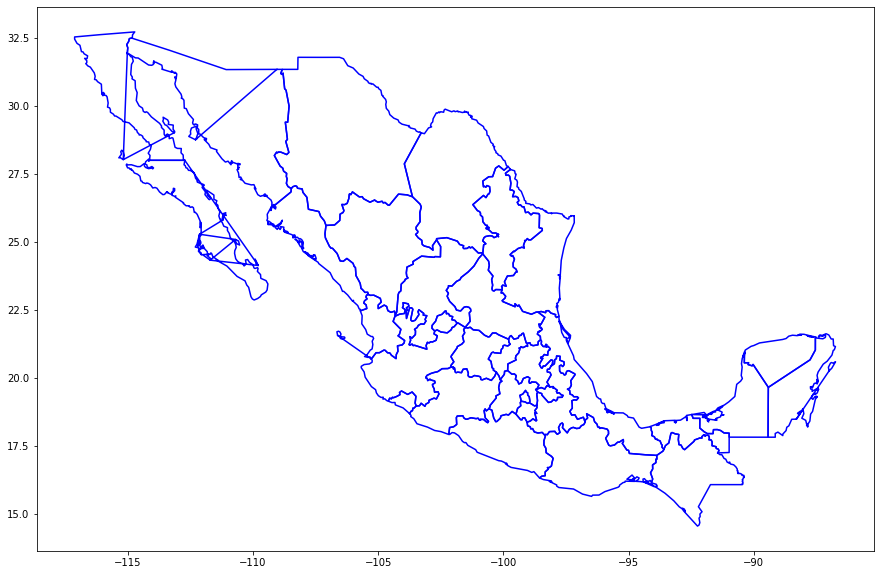

In [30]:
estados = shp.Reader("México_Estados.shp",encoding="ISO-8859-1")
plot_map(estados,"blue")

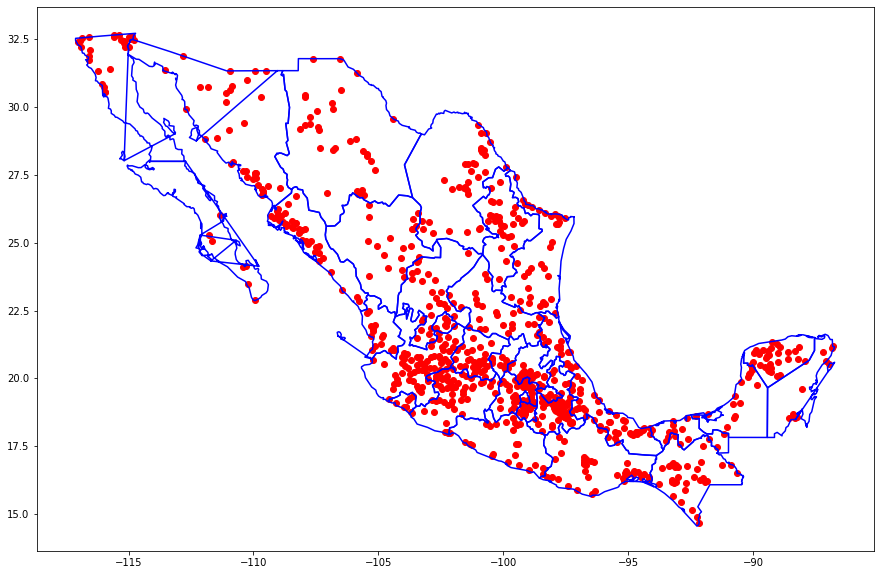

In [46]:
plot_map(estados,"blue")
areas_Mexico =  read_shapefile(asf)
for i in range(0,len(areas_Mexico)):
    plt.scatter(areas_Mexico.coords[i][0][0],areas_Mexico.coords[i][0][1],color="red")
    #el eje x es areas_Mexico.coords[i][0][0]